In [4]:
# Read in the data from the data folder
import pandas as pd

titanic = pd.read_csv('./data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
import numpy as np

In [5]:
feat=['PassengerId','Name','Ticket','Sex','Cabin',"Embarked"]
titanic.drop(feat,axis=1,inplace=True)

In [6]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [7]:
titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [15]:
from scipy import stats
def describe_cont_features(feature):
    print('result for {} '.format(feature))
    print(titanic.groupby('Survived')[feature].describe())
    print(ttest(feature))
    
def ttest(feature):
    survived=titanic[titanic['Survived']==1][feature]
    not_survived=titanic[titanic['Survived']==0][feature]
    tstat,pval=stats.ttest_ind(survived,not_survived,equal_var=False)
    print('tstat: {:.1f},pvalue: {:.3} '.format(tstat,pval))
    
    

In [16]:
# Look at the distribution of each feature at each level of the target variable
for feature in ['Pclass','Age','SibSp','Parch','Fare']:
    describe_cont_features(feature)

result for Pclass 
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  2.531876  0.735805  1.0  2.0  3.0  3.0  3.0
1         342.0  1.950292  0.863321  1.0  1.0  2.0  3.0  3.0
tstat: -10.3,pvalue: 2.91e-23 
None
result for Age 
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0
tstat: nan,pvalue: nan 
None
result for SibSp 
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  0.553734  1.288399  0.0  0.0  0.0  1.0  8.0
1         342.0  0.473684  0.708688  0.0  0.0  0.0  1.0  4.0
tstat: -1.2,pvalue: 0.233 
None
result for Parch 
          count      mean       std  min  25%  50%  75%  max
Survived   

In [17]:
# Look at the average value of each feature based on whether Age is missing
titanic.groupby(titanic['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


In [18]:
#Plotting and exploring continuous features

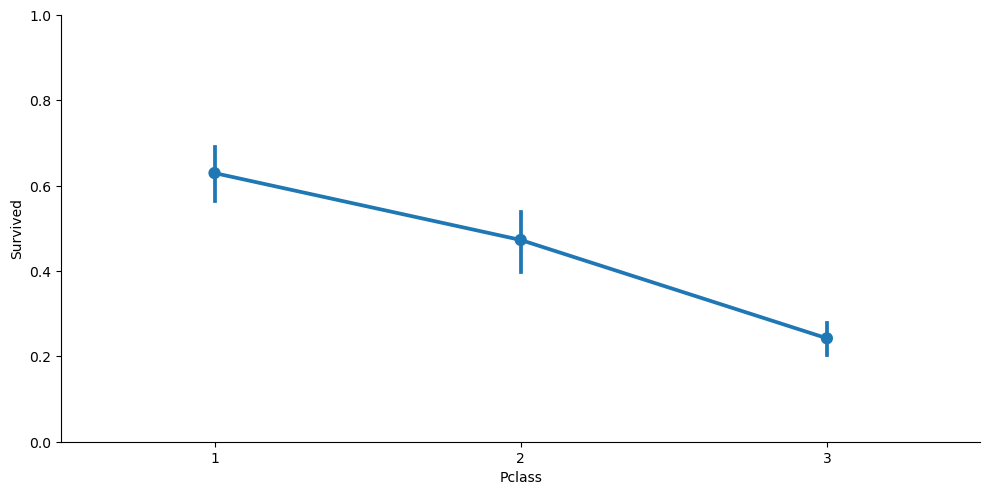

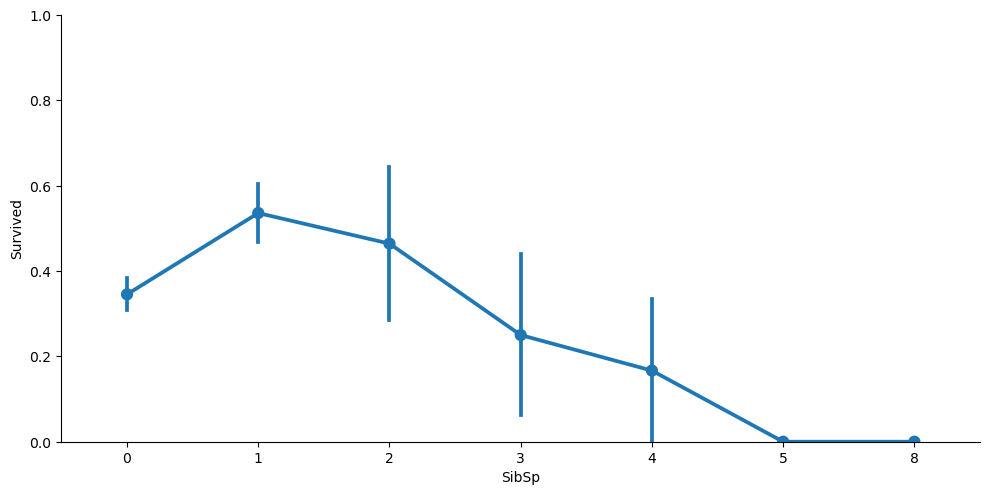

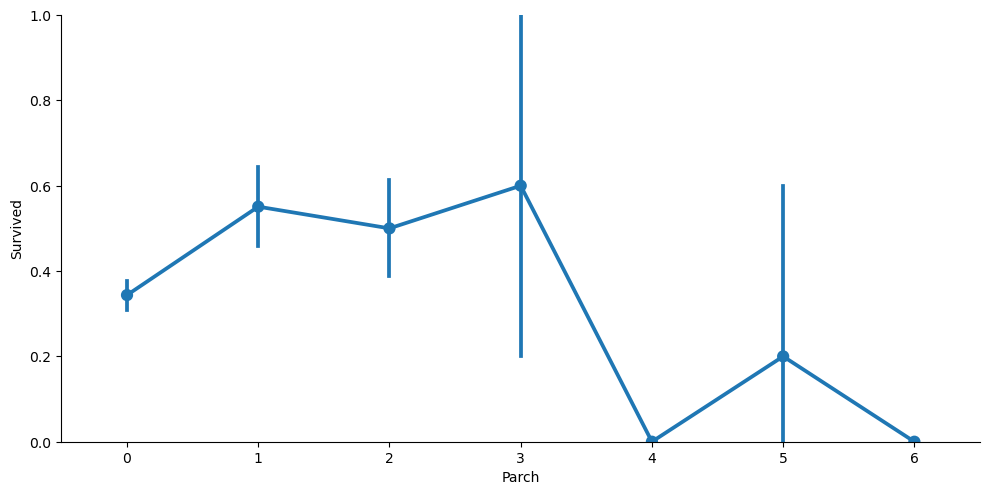

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
for col in ['Pclass', 'SibSp', 'Parch']:
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )
    plt.ylim(0, 1)

In [20]:
#since sibling spouses and parents,chldrens are similar features under family member,we can create new column
titanic['family_count']= titanic['SibSp']+ titanic['Parch']

In [24]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,family_count
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,1
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,1
4,0,3,35.0,0,0,8.0500,0


(0.0, 1.0)

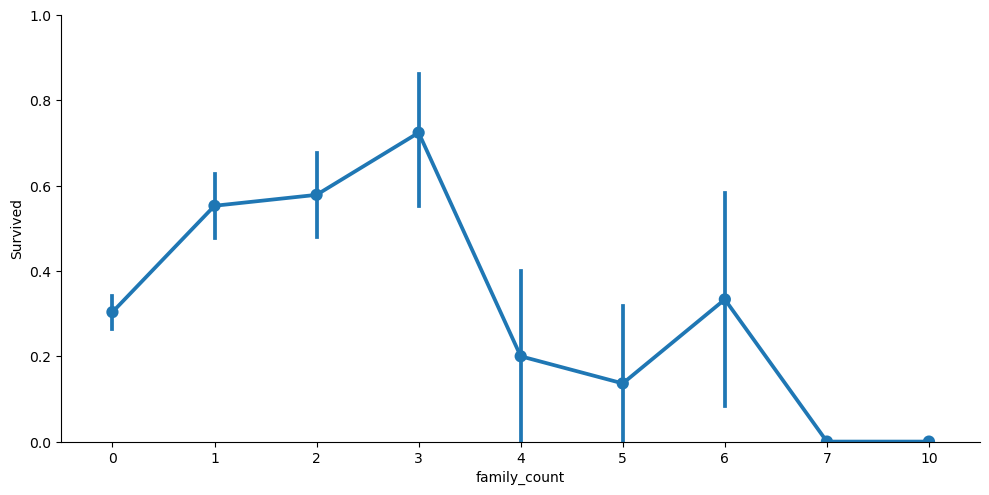

In [27]:
sns.catplot(x='family_count', y='Survived', data=titanic, kind='point', aspect=2, )
plt.ylim(0, 1)

At this point it is not clear that weather merging both features provides better result since the plot shows inconsistent result

let's explore categorical data now


In [28]:
titanic = pd.read_csv('./data/titanic.csv')
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
# Drop all continuous features
cont_feat = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
titanic.drop(cont_feat, axis=1, inplace=True)
titanic.head()

,Survived,Name,Sex,Ticket,Cabin,Embarked
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,0,"Allen, Mr. William Henry",male,373450,NaN,S


In [32]:
#checking missing values
titanic.isnull().sum()

Survived      0
Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [35]:
# Explore the number of unique values for each feature
for column in titanic.columns:
    print('{}:{} unique data'.format(column,titanic[column].nunique()))

Survived:2 unique data
Name:891 unique data
Sex:2 unique data
Ticket:681 unique data
Cabin:147 unique data
Embarked:3 unique data


In [36]:
# Check survival rate by gender
titanic.groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [37]:
# Is Cabin missing at random?
titanic.groupby(titanic['Cabin'].isnull()).mean()

,Survived
Cabin,
False,0.666667
True,0.299854


In [39]:
#create titlefeature because it may have some meaning although name doesn't really matters much
titanic['Title']= titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic.head()

,Survived,Name,Sex,Ticket,Cabin,Embarked,Title
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,Mrs
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,Mrs
4,0,"Allen, Mr. William Henry",male,373450,NaN,S,Mr


In [40]:
titanic.pivot_table('Survived',index=['Title','Sex'],aggfunc=['count','mean'])

count      mean
                    Survived  Survived
Title        Sex                      
Capt         male          1  0.000000
Col          male          2  0.500000
Don          male          1  0.000000
Dr           female        1  1.000000
             male          6  0.333333
Jonkheer     male          1  0.000000
Lady         female        1  1.000000
Major        male          2  0.500000
Master       male         40  0.575000
Miss         female      182  0.697802
Mlle         female        2  1.000000
Mme          female        1  1.000000
Mr           male        517  0.156673
Mrs          female      125  0.792000
Ms           female        1  1.000000
Rev          male          6  0.000000
Sir          male          1  1.000000
the Countess female        1  1.000000

In [43]:
titanic['Relevant_Title']=titanic['Title'].apply(lambda x:x if x in ['Master','Mr','Mrs','Miss'] else 'Other')
titanic['Cabin_Ind']=np.where(titanic['Cabin'].isnull(),0,1)
titanic.head()

,Survived,Name,Sex,Ticket,Cabin,Embarked,Title,Relevant_Title,Cabin_Ind
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,Mr,Mr,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,Mrs,Mrs,1
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,Miss,Miss,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,Mrs,Mrs,1
4,0,"Allen, Mr. William Henry",male,373450,NaN,S,Mr,Mr,0


Let's plot categorical features

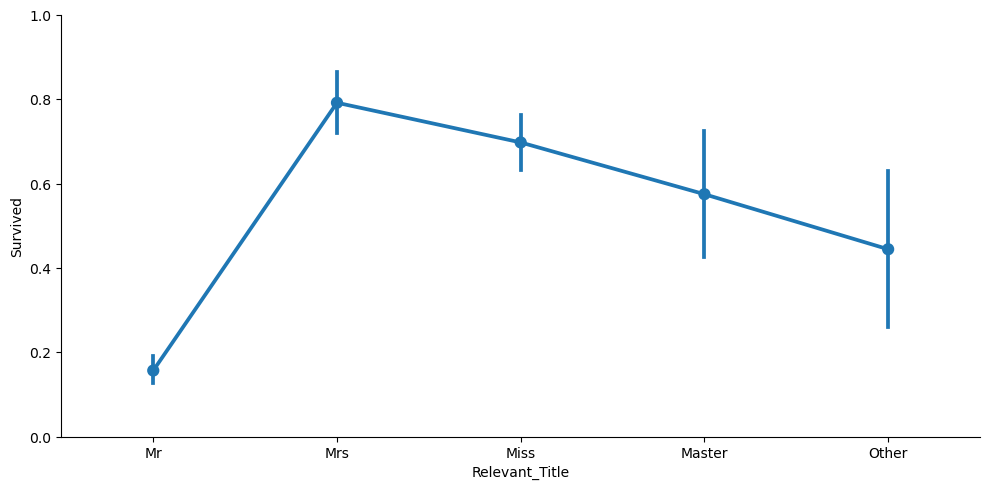

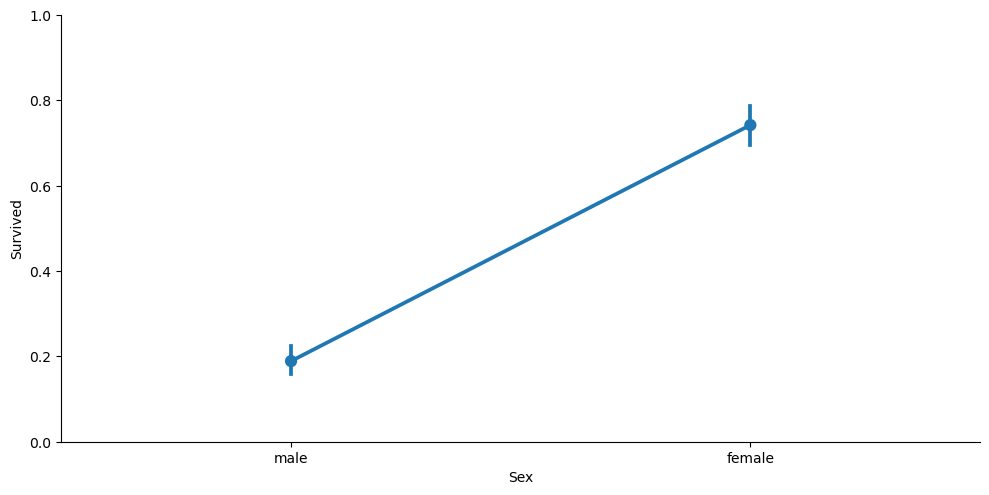

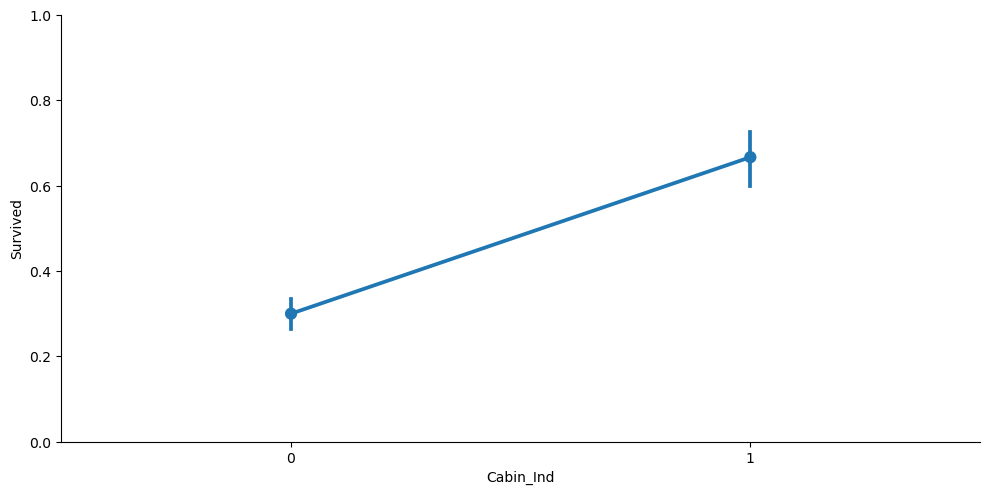

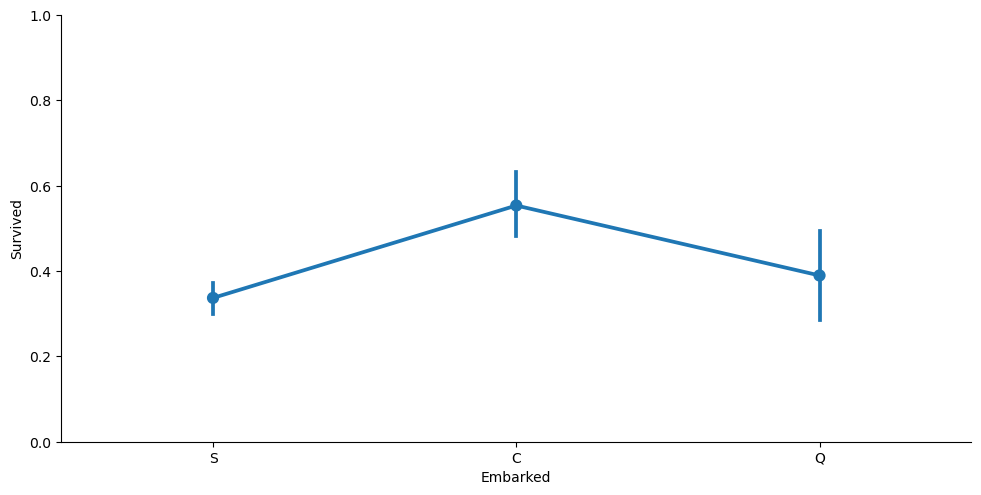

In [46]:
#checking surviva rates for each title
for col in ['Relevant_Title','Sex','Cabin_Ind','Embarked']:
    sns.catplot(x=col,y='Survived',data=titanic,kind='point',aspect=2,)
    plt.ylim(0,1)

In [48]:
#check embark features with cabin features
titanic.pivot_table('Survived',index='Cabin_Ind',columns='Embarked',aggfunc='count')

Embarked,C,Q,S
Cabin_Ind,,,
0,99,73,515
1,69,4,129
